In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
total_data = pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      320504 non-null  object 
 1   time_occ      320504 non-null  int64  
 2   area_name     320504 non-null  int64  
 3   crm_cd_desc   320504 non-null  int64  
 4   vict_age      320504 non-null  int64  
 5   vict_sex      320504 non-null  int64  
 6   vict_descent  320504 non-null  int64  
 7   premis_desc   320504 non-null  int64  
 8   weapon_desc   320504 non-null  int64  
 9   status_desc   320504 non-null  int64  
 10  location      320504 non-null  int64  
 11  lat           320504 non-null  float64
 12  lon           320504 non-null  float64
 13  weekday       320504 non-null  int64  
 14  month         320504 non-null  int64  
 15  mocodes_desc  320504 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 39.1+ MB


In [7]:
prueba = total_data[total_data["crm_cd_desc"].isin([10, 26, 38, 66, 83, 118])]

In [4]:
prueba['date_occ'] = pd.to_datetime(prueba['date_occ'], errors='coerce')
prueba['date_occ'] = prueba['date_occ'].astype('int64')

In [8]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28201 entries, 15 to 320496
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      28201 non-null  int64  
 1   time_occ      28201 non-null  int64  
 2   area_name     28201 non-null  int64  
 3   crm_cd_desc   28201 non-null  int64  
 4   vict_age      28201 non-null  int64  
 5   vict_sex      28201 non-null  int64  
 6   vict_descent  28201 non-null  int64  
 7   premis_desc   28201 non-null  int64  
 8   weapon_desc   28201 non-null  int64  
 9   status_desc   28201 non-null  int64  
 10  location      28201 non-null  int64  
 11  lat           28201 non-null  float64
 12  lon           28201 non-null  float64
 13  weekday       28201 non-null  int64  
 14  month         28201 non-null  int64  
 15  mocodes_desc  28201 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 3.7 MB


c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

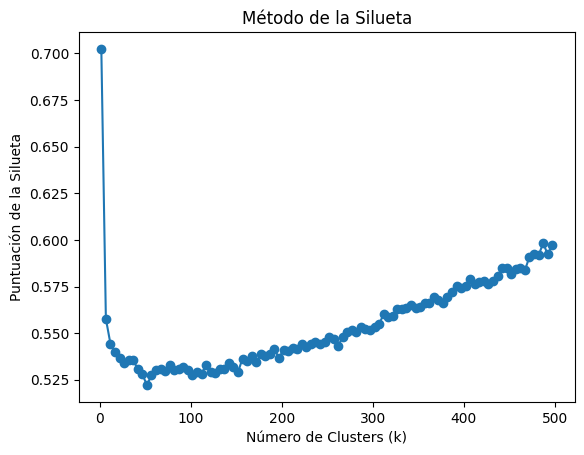

Número óptimo de clusters (k) según el método de la silueta: 2


In [11]:
from sklearn.metrics import silhouette_score, silhouette_samples
# Probar diferentes valores de k
k_values = range(2, 500, 5)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(prueba)
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(prueba, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()
# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (1469) found smaller than n_clusters (2000). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWar

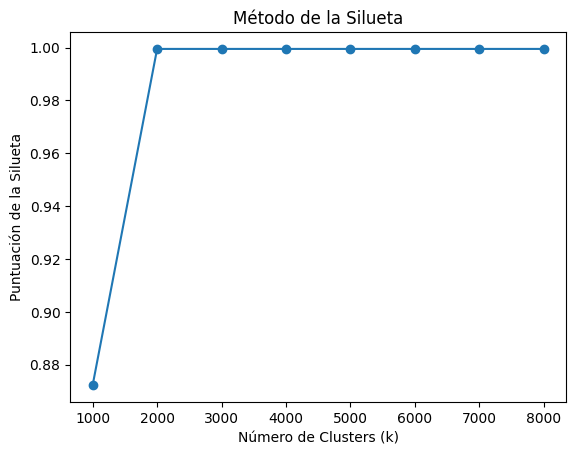

Número óptimo de clusters (k) según el método de la silueta: 2000


In [12]:
from sklearn.metrics import silhouette_score, silhouette_samples
# Probar diferentes valores de k
k_values = range(1000, 8800, 1000)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(prueba)
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(prueba, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()
# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

In [13]:
silhouette_scores

[0.8723613390692992,
 0.9995035637034148,
 0.9995035637034148,
 0.9995035637034148,
 0.9995035637034148,
 0.9995035637034148,
 0.9995035637034148,
 0.9995035637034148]